In [1]:
# Computer Vision Image Analysis 

# Vision Image Analysis : 컴퓨터 이미지 분석
# Azure 의 Resource인 Cumputer Vison을 이용해서 원하는 이미지를 분석할 수 있다.
# 일단 Azure 계정이 필요함, 그리고 Resource를 불러와야함 from marketplace

In [2]:
import requests # requests module은 http/https에 요청(불러오기)를 할 수 있는 method가 있는 기능책 / 모듈의 형태는 모두 ~.py 파일
from io import BytesIO
from PIL import Image

# https://me2nuk.com/Python-requests-module-example/ -> requests module에 관한 내용

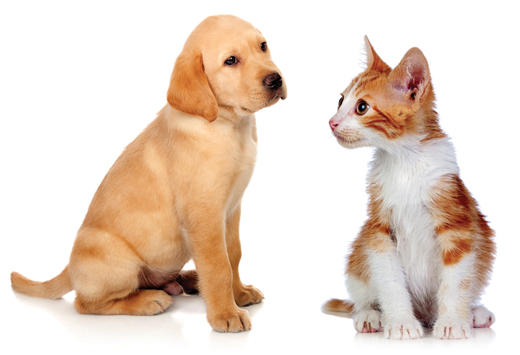

In [3]:
image_url = 'https://menu.mt.co.kr/moneyweek/thumb/2017/05/17/06/2017051709058028746_1.jpg'
image = Image.open(BytesIO(requests.get(image_url).content))
#response = requests.get(image_url)
#img = BytesIO(response.content)
#image = Image.open(img)
image

In [4]:
# 필요한 값들을 준비한다. 
key = '4a2f7a09c5014149b1b727802b2b6680'
endpoint = 'https://labuser10computervision1.cognitiveservices.azure.com/' + 'vision/v2.0/'

In [5]:
analyze_endpoint = endpoint + 'analyze'
detect_endpoint = endpoint + 'detect'

In [6]:
header = {'Ocp-Apim-Subscription-Key': key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [7]:
response = requests.post(analyze_endpoint, 
              headers=header,
              params=params,
              json=data)

ConnectionError: HTTPSConnectionPool(host='labuser10computervision1.cognitiveservices.azure.com', port=443): Max retries exceeded with url: /vision/v2.0/analyze?visualFeatures=Categories%2CDescription%2CColor (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002B401A071C0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
result = response.json()
result

{'categories': [],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': 'A94B22',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['dog',
   'indoor',
   'animal',
   'brown',
   'sitting',
   'mammal',
   'looking',
   'front',
   'orange',
   'standing',
   'cat',
   'water',
   'playing',
   'laying'],
  'captions': [{'text': 'a dog looking at the camera',
    'confidence': 0.9190374806149555}]},
 'requestId': '5bffe20e-085e-4949-92e0-9c7122f855ac',
 'metadata': {'height': 355, 'width': 520, 'format': 'Jpeg'}}

In [ ]:
result['description'] ['captions'] [0] ['text']

'a dog looking at the camera'

In [ ]:
# Object Detection 실제로 더 많이 사용되고 있는 기술


headers = { 'Ocp-Apim-Subscription-Key' : key}   # header 설정
params = {}
data = {'url' : image_url }

In [ ]:
response = requests.post(detect_endpoint,
                         headers=headers,
                         params=params,     # object detection은 parameter 자체가 없음, 내용이 없어도 params = params 해주는 것이 좋음
                         json=data)

In [ ]:
result = response.json()
result

#   {'rectangle': {'x': 324, 'y': 30, 'w': 174, 'h': 318}, 사진상 Object의 좌표계가 나오는게 큰 특징임!
#   4각형의 좌측 상단이 x,y 값, w,h를 각각 더하면 4각형이 만들어짐 -> object의 위치
#   최상위 구조가 objects [ ]안의 내용(rectangel)이 반복적으로 나타남

{'objects': [{'rectangle': {'x': 10, 'y': 20, 'w': 280, 'h': 309},
   'object': 'golden retriever',
   'confidence': 0.517,
   'parent': {'object': 'retriever',
    'confidence': 0.905,
    'parent': {'object': 'dog',
     'confidence': 0.921,
     'parent': {'object': 'mammal',
      'confidence': 0.932,
      'parent': {'object': 'animal', 'confidence': 0.932}}}}},
  {'rectangle': {'x': 324, 'y': 30, 'w': 174, 'h': 318},
   'object': 'cat',
   'confidence': 0.716,
   'parent': {'object': 'mammal',
    'confidence': 0.889,
    'parent': {'object': 'animal', 'confidence': 0.89}}}],
 'requestId': '586a0a8c-4b4c-4cac-9214-61e31c8728eb',
 'metadata': {'height': 355, 'width': 520, 'format': 'Jpeg'}}

In [ ]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)    #   image를 draw 모드로 바꿔주는 작업

In [ ]:
def MakeBox(res):
  objects = res['objects']
  for obj in objects:
    rect = obj['rectangle']
    print(rect)
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)), outline='red')

    objectName = obj['object']
    draw.text((x,y), objectName, fill = 'red')

In [8]:
MakeBox(result)

NameError: name 'MakeBox' is not defined

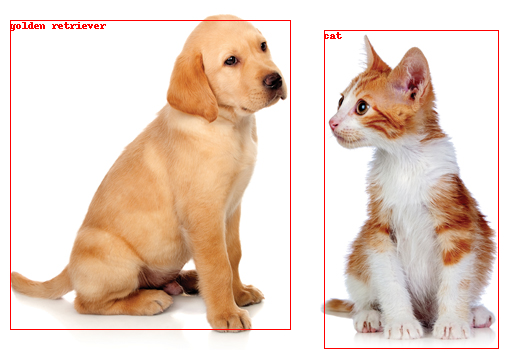

In [ ]:
image

In [ ]:
ocr_endpoint = endpoint + 'ocr'

In [ ]:
image_url = "https://www.unikorea.go.kr/unikorea/common/images/content/peace.png"
image = Image.open(BytesIO(requests.get(image_url).content))

In [ ]:
# 외부로 출력하기 위해서 header, params, data 설정

headers = {'Ocp-Apim-Subscription-key':key}
params = {'language':'ko', 'detectOrientation':'true'}     
# 언어를 잘 모를때는 unk(unknown) 쓰면 auto detect가 된다.
# detectOrientaion : true 문서의 방향으로 자동으로 정하겠다.
data = {'url' : image_url}

In [ ]:
response = requests.post(ocr_endpoint,
                         headers=headers,
                         params=params,
                         json=data)
result = response.json()
result

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '45,125,95,36',
   'lines': [{'boundingBox': '45,125,95,17',
     'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
      {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
    {'boundingBox': '70,144,46,17',
     'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}]}

In [ ]:
# JSON 안의 원하는 데이터를 뽑기 위한 과정.

for reg in result['regions'] :
    for line in reg['lines'] :              # lines:[{}] -> 라인 안에 여러 개의 값이 있음, 글자 단위의 line을 추출 할 수 있음
        for word in line['words'] :     # 단어들과 라인을 추출 할 수 있음
            print(word['text'])             # word 안의 text만 추출 할 수 있음.

평화와
번영의
한반도
